Q1. Perform the following operations on Age-Income dataset (Age-
Income-Dataset.csv)

Provide summary statistics (mean, median, minimum, maximum,
standard deviation) for numeric variables with and without using
any library functions.
Provide summary statistics of income grouped by the age groups.
Create a list that contains a numeric value for each response to the
categorical variable.

In [40]:
#importing all the necessary libraries
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#importing the dataset
df=pd.read_csv('/content/drive/MyDrive/Age-Income-Dataset - Sheet1.csv')

In [42]:
df

,Age,Income
0,Young,25000
1,Middle Age,54000
2,Old,60000
3,Young,15000
4,Young,45000
5,Young,65000
6,Young,70000
7,Young,30000
8,Middle Age,27000
9,Young,23000


In [43]:
df.dtypes

Age       object
Income     int64
dtype: object

In [44]:
#checking for the missing values
missing_values=df.isnull().sum()
print(missing_values)

Age       0
Income    0
dtype: int64


In [45]:
df.describe()

,Income
count,50.000000
mean,50966.000000
std,21096.683268
min,15000.000000
25%,33475.000000
50%,46850.000000
75%,65400.000000
max,93000.000000


Mean

In [46]:
#calculating mean using the formula
mean_income=sum(df['Income'])/len(df['Income'])
mean_income

50966.0

In [47]:
#calculating using statistics library function
mean_income=statistics.mean(df['Income'])
mean_income

50966

In [48]:
#calulating mean using numpy
mean_income=np.mean(df['Income'])
print(mean_income)

50966.0


In [49]:
#caluclating mean using pandas
mean_income=df['Income'].mean()
print(mean_income)

50966.0


Median

In [50]:
#calculating median by formula
n= len(df['Income'])
if n%2:
  income_median= sorted(df['Income'])[round(0.5*(n-1))]
else:
  x_ord, index = sorted(df['Income']), round(0.5 * n)
  income_median = 0.5 * (x_ord[index-1] + x_ord[index])  
print(income_median)

46850.0


In [51]:
#calculating median using statistic library function
income_median=statistics.median(df['Income'])
income_median

46850.0

In [52]:
#calculating median using numpy
income_median=np.median(df['Income'])
income_median

46850.0

In [53]:
#calculating median using pandas
income_median=df['Income'].median()
income_median

46850.0

Minimum

In [54]:
#calculating min using numpy
min_income=np.min(df['Income'])
min_income

15000

In [55]:
#calculating min using pandas
min_income=df['Income'].min()
min_income

15000

In [56]:
#calculating min using formula
list=df['Income']
def minimum(list):
  current_min = list[0]  # Start by assuming the first number is smallest
  for num in list:       # Loop through each number in the list
    if num < current_min:
      current_min = num  # Update current_min if current number is less
  return current_min
print(minimum(list))

15000


Maximum

In [57]:
#calculating max using numpy
max_income=np.max(df['Income'])
max_income

93000

In [58]:
#calculating max using pandas
max_income=df['Income'].max()
max_income

93000

In [59]:
#calculating max using formula
l=df['Income']
max=l[0]
for i in range(1,len(l)):
    if(l[i]>max):
        max=l[i]
print(max)

93000


Standard Deviation

In [60]:
# Calculating Variance using formula
n = len(df['Income'])
income_mean = sum(df['Income']) / n
income_var = sum((item - income_mean)**2 for item in df['Income']) / (n - 1)

income_std = income_var**0.5
print(income_std)

21096.683267707253


In [61]:
#calculating std using statistics library function
income_std=statistics.stdev(df['Income'])
income_std

21096.683267707253

In [62]:
#calculating max using numpy
income_std=np.std(df['Income'],ddof=1)
income_std

21096.683267707253

In [63]:
#calculating max using pandas
income_std=df['Income'].std(ddof=1)
income_std

21096.683267707253

Defining the categories of the age column, calculating their stats and then making a dataframe

In [64]:
old = df[df['Age']=='Old']
young = df[df['Age']=='Young']
middle_age = df[df['Age']=='Middle Age']

In [65]:
old_stats = old.describe()['Income']
young_stats = young.describe()['Income']
middle_age_stats = middle_age.describe()['Income']

In [66]:
data = {'Old': old_stats, 'Young': young_stats, 'Middle': middle_age_stats}
new_df = pd.DataFrame(data)
new_df

,Old,Young,Middle
count,19.000000,16.000000,15.000000
mean,53942.105263,46037.500000,52453.333333
std,20868.165968,22356.859499,20497.800114
min,24500.000000,15000.000000,25600.000000
25%,38700.000000,28750.000000,36900.000000
50%,45300.000000,41500.000000,53200.000000
75%,71400.000000,65850.000000,61200.000000
max,89700.000000,87000.000000,93000.000000


In [67]:
df['Age'].value_counts()

Old           19
Young         16
Middle Age    15
Name: Age, dtype: int64

Q2. Write a Python program to display some basic statistical details

like percentile, mean, standard deviation etc. of the species of ‘Iris-
setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset.

Calculate the measures of variability. Calculate and provide the
visualization of the Correlation among the variables.

Calculating the basic stats and dropping the id column

In [68]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv - Iris.csv.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
species = df['Species'].unique()
df.drop(columns=['Id'], inplace=True)
for s in species:
    print('Species: ', s)
    print(df[df['Species']==s].describe())
    print()

Species:  Iris-setosa
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000

Species:  Iris-versicolor
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000      1.000000
25%         5.600000      2.525000       4.000000      

Correlation using scatterplot

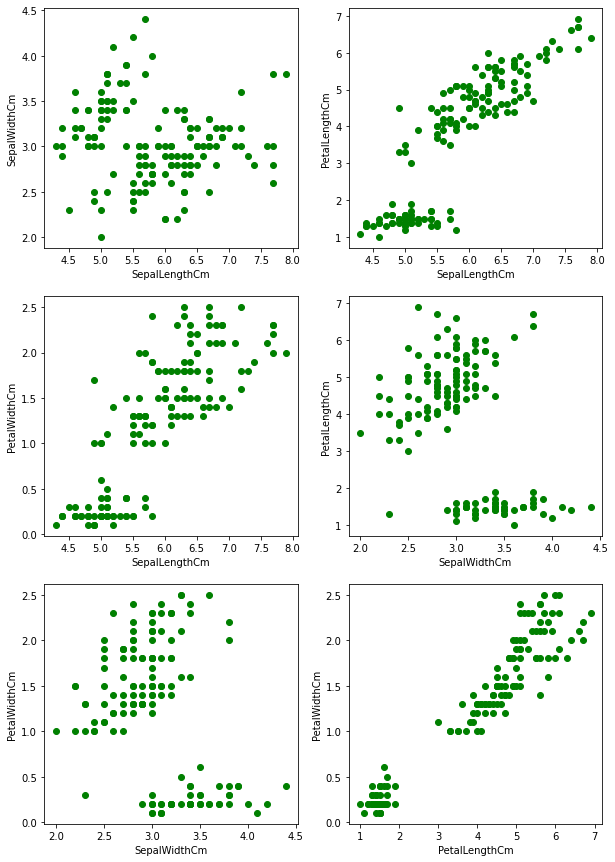

In [70]:
figure = plt.figure(figsize=(10, 15))
index = 1
for i in range(3):
    for j in range(i+1,4):
        plt.subplot(3, 2, index)
        plt.scatter(df[df.columns[i]], df[df.columns[j]], color='green')
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        index += 1